In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
from functions_parameters.universal_parameters import a, b
from functions_parameters.tools import rot_symm_m_check_d, translation_check_d, array_print
from itertools import product

In [2]:
final_result = np.load('schf_filling_0p8_t_4_em4_random_basis_mesh_30_2_2_seed_121.npz')


final_ground_state_e_diff_density = final_result['gse']
final_density = final_result['d']
final_bond = final_result['bond']
final_e_difference = final_result['e_diff']
final_c_difference = final_result['c_diff']
final_e_fermi = final_result['e_fermi']
final_iteration = final_result['iters']
any_bi_fail = final_result['any_bi_fail']

u_arr = final_result['u']
v1_arr = u_arr
u_mesh, v1_mesh = np.meshgrid(u_arr, v1_arr, indexing = 'ij')

In [3]:
np.max(final_c_difference)

np.float64(0.24872546890167818)

In [4]:
np.max(final_e_difference)

np.float64(0.00023533751710980155)

In [5]:
np.all(np.logical_not(any_bi_fail))

np.True_

## combine witht the original data set and rerun data set

In [6]:
final_result_old = np.load('schf_filling_0p8_t_4_em4_random_basis_mesh_30_2_2.npz')


final_ground_state_e_diff_density_old = final_result_old['gse']
final_density_old = final_result_old['d']
final_bond_old = final_result_old['bond']
final_e_difference_old = final_result_old['e_diff']
final_c_difference_old = final_result_old['c_diff']
final_e_fermi_old = final_result_old['e_fermi']
final_iteration_old = final_result_old['iters']
any_bi_fail_old = final_result_old['any_bi_fail']

In [7]:
final_result_rerun = np.load('schf_filling_0p8_t_4_em4_mesh_30_2_2_rerun.npz')

final_ground_state_e_diff_density_rerun = final_result_rerun['gse']
final_density_rerun = final_result_rerun['d']
final_bond_rerun = final_result_rerun['bond']
final_e_difference_rerun = final_result_rerun['e_diff']
final_c_difference_rerun = final_result_rerun['c_diff']
final_e_fermi_rerun = final_result_rerun['e_fermi']
final_iteration_rerun = final_result_rerun['iters']
any_bi_fail_rerun = final_result_rerun['any_bi_fail']

In [8]:
final_ground_state_e_diff_density = np.concatenate((final_ground_state_e_diff_density, final_ground_state_e_diff_density_old, final_ground_state_e_diff_density_rerun), axis=2)
final_density = np.concatenate((final_density, final_density_old, final_density_rerun), axis=2)
final_bond = np.concatenate((final_bond, final_bond_old, final_bond_rerun), axis=2)
final_e_difference = np.concatenate((final_e_difference, final_e_difference_old, final_e_difference_rerun), axis=2)
final_c_difference = np.concatenate((final_c_difference, final_c_difference_old, final_c_difference_rerun), axis=2)
final_e_fermi = np.concatenate((final_e_fermi, final_e_fermi_old, final_e_fermi_rerun), axis=2)
final_iteration = np.concatenate((final_iteration, final_iteration_old, final_iteration_rerun), axis=2)
any_bi_fail = np.concatenate((any_bi_fail, any_bi_fail_old, any_bi_fail_rerun), axis=2)

In [9]:
np.all(np.logical_not(any_bi_fail))

np.True_

### Some points do not converge

In [10]:
index_c_diff = np.where(np.abs(final_c_difference)>1E-4)
final_ground_state_e_diff_density[index_c_diff] = 0
index_e_diff = np.where(np.abs(final_e_difference)>1E-4)
final_ground_state_e_diff_density[index_e_diff] = 0

In [11]:
index_c_diff

(array([ 1,  1,  2,  2,  2,  2,  3,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,
         7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
         8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
         9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
        11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
        13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
        13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
        14, 

In [12]:
final_c_difference[index_c_diff]

array([2.74672474e-03, 1.21714290e-04, 9.75054707e-04, 2.60142632e-04,
       1.23727645e-04, 2.06191405e-04, 2.28797006e-04, 1.32843690e-04,
       1.28025935e-02, 1.28025934e-02, 1.80877462e-02, 1.80877462e-02,
       1.80877462e-02, 1.80877462e-02, 1.28025935e-02, 1.28025934e-02,
       1.80877457e-02, 1.80877462e-02, 1.80877462e-02, 1.80877462e-02,
       1.80828192e-02, 1.80877462e-02, 1.80877462e-02, 6.15164209e-04,
       2.13049316e-04, 1.16819520e-04, 4.49776075e-02, 4.49776075e-02,
       4.49776075e-02, 4.49776075e-02, 4.49776075e-02, 4.49776075e-02,
       4.49776075e-02, 4.49776075e-02, 4.49776075e-02, 4.49776075e-02,
       4.49776075e-02, 4.49776075e-02, 4.49776075e-02, 4.49776075e-02,
       4.49776075e-02, 4.35180159e-04, 7.50054686e-02, 7.50054686e-02,
       7.50054686e-02, 7.50054686e-02, 7.50054686e-02, 7.50054686e-02,
       7.50054686e-02, 7.50054686e-02, 7.50054686e-02, 7.50054686e-02,
       7.50054686e-02, 7.50054686e-02, 7.50054686e-02, 7.50054686e-02,
      

### Phase Analysis

In [13]:
sorted_ground_state_e_index = np.argsort(final_ground_state_e_diff_density, axis=2)
sorted_ground_state_e= np.take_along_axis(final_ground_state_e_diff_density, sorted_ground_state_e_index, axis=2)
sorted_density = np.take_along_axis(final_density, sorted_ground_state_e_index[:,:,:,np.newaxis,np.newaxis], axis=2)
sorted_bond = np.take_along_axis(final_bond, sorted_ground_state_e_index[:,:,:,np.newaxis,np.newaxis,np.newaxis,np.newaxis,np.newaxis], axis=2)
sorted_e_difference = np.take_along_axis(final_e_difference, sorted_ground_state_e_index, axis=2)
sorted_c_difference = np.take_along_axis(final_c_difference, sorted_ground_state_e_index, axis=2)

In [14]:
from functions_parameters.universal_parameters import phase_tot, threshold, c_6_2_uc, c_3_2_uc, c_2_2_uc, translation_a1, translation_a2, translation_a3
from functions_parameters.tools import phase_check_nematic_magnetic

phase_diagram_based_on_d = np.zeros((v1_mesh.shape))
nematic_measure = np.zeros((u_mesh.shape), np.float64)
ts_check = np.zeros((u_mesh.shape), np.int32)
f_phase = np.zeros((u_mesh.shape), np.int32)
f_measure = np.zeros((u_mesh.shape), np.float64)
f_max_measure = np.zeros((u_mesh.shape), np.float64)

for i in range(u_mesh.shape[0]):
    for j in range(u_mesh.shape[1]):
        d_ij = sorted_density[i,j,0]
        ts_recording = np.zeros((3))
        ts_diff_arr = translation_check_d(d_ij, translation_a1, translation_a2, translation_a3)
        if np.all(ts_diff_arr<threshold):
            ts_recording[0] = 1
        elif np.all(ts_diff_arr>threshold):
            ts_recording[-1] = 1
        else:
            ts_recording[1] = 1
        ts_check[i,j] = np.argmax(ts_recording)
        rs_recording, m_recording, c6_diff, magnetism_arr = phase_check_nematic_magnetic(d_ij, c_6_2_uc, c_3_2_uc, c_2_2_uc)
        nematic_measure[i,j] = c6_diff
        f_phase[i,j] = np.argmax(m_recording)
        f_measure[i,j] = np.mean(np.abs(magnetism_arr))
        f_max_measure[i,j] = np.max(np.abs(magnetism_arr))
        phase_arr = np.kron(ts_recording,rs_recording)
        phase_arr = np.kron(phase_arr,m_recording)
        phase = np.argmax(phase_arr)
        phase_diagram_based_on_d[i,j] = phase

unique_phase_index = np.unique(phase_diagram_based_on_d)
unique_phase_name = [phase_tot[i] for i in np.int_(unique_phase_index)]
filtered_phase_diagram = np.zeros(phase_diagram_based_on_d.shape)
for i in range(u_mesh.shape[0]):
    for j in range(u_mesh.shape[1]):
        filtered_phase_diagram[i,j] = np.where(unique_phase_index==phase_diagram_based_on_d[i,j])[0][0]

Text(0.5, 1.0, 'filling = 0.8')

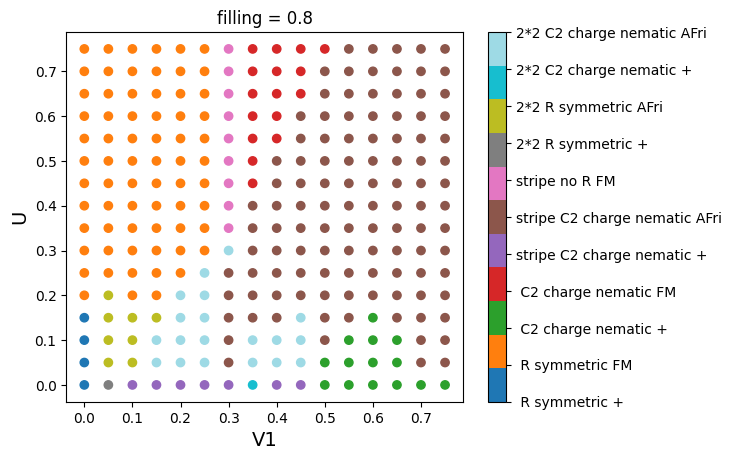

In [15]:
cmap = plt.get_cmap("tab20", len(unique_phase_index))
plt.scatter(v1_mesh, u_mesh, c=filtered_phase_diagram, cmap=cmap)
plt.xlabel('V1', size = '14')
plt.ylabel('U', size = '14')
colorbar_ticks = np.arange(len(unique_phase_index))
cbar = plt.colorbar()
cbar.set_ticks(np.arange(len(unique_phase_index)))
cbar.set_ticklabels(unique_phase_name)
plt.title('filling = 0.8')

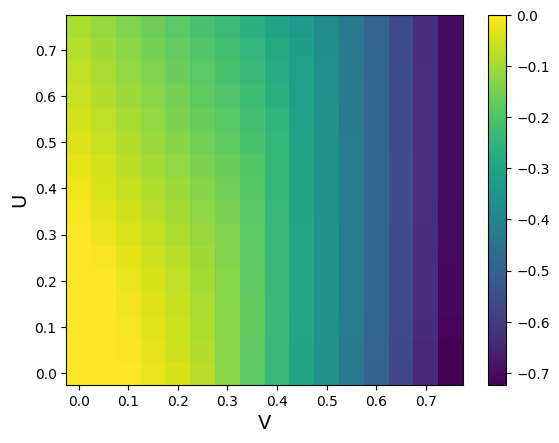

In [16]:
plt.pcolormesh(v1_mesh,u_mesh,sorted_ground_state_e[:,:,0])
plt.xlabel('V', size = '14')
plt.ylabel('U', size = '14')
plt.colorbar()

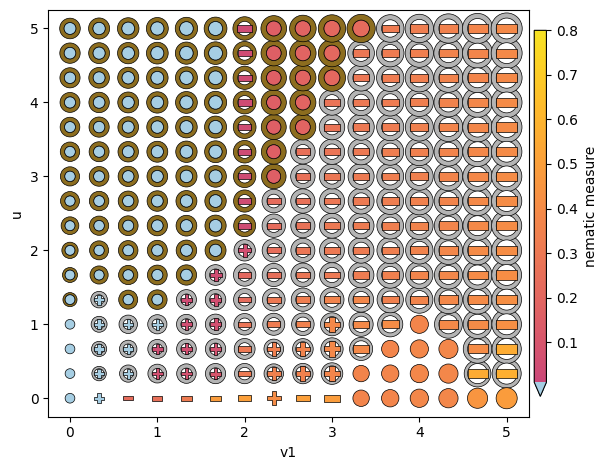

In [46]:
from functions_parameters.phase_plot import PlotConfig, plot_phase_map

CFG = PlotConfig(nem_vmax=0.8)
# fig, ax = plt.subplots(constrained_layout=False)
fig, ax = plt.subplots()
plot_phase_map(
    fig,
    ax,
    v1_mesh/0.15, u_mesh/0.15,
    sorted_ground_state_e/4,               # [...,0] read inside
    nematic_measure,
    ts_check, f_phase,
    f_max_measure,                       # or f_measure if you prefer mean
    cfg=CFG,
)
# ax.set_box_aspect(1)  
ax.set_xlabel("v1")
ax.set_ylabel("u")
plt.tight_layout(); plt.show()

In [18]:
np.min(sorted_ground_state_e[:,:,0]/4)

np.float64(-0.180874389584412)

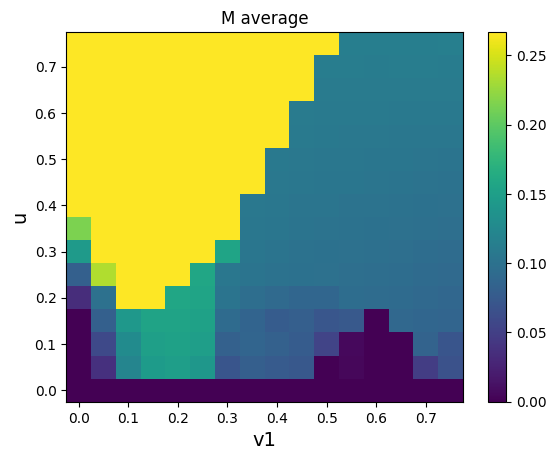

In [19]:
plt.pcolormesh(v1_mesh, u_mesh, f_measure)
plt.colorbar()
plt.xlabel('v1', size = '14')
plt.ylabel('u', size = '14')
plt.title('M average')
plt.show()

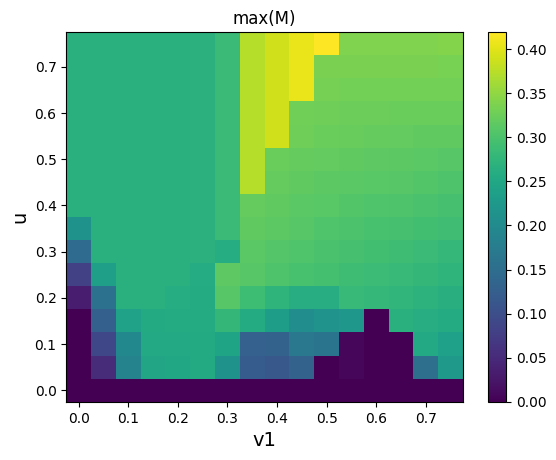

In [20]:
plt.pcolormesh(v1_mesh, u_mesh, f_max_measure)
plt.colorbar()
plt.xlabel('v1', size = '14')
plt.ylabel('u', size = '14')
plt.title('max(M)')
plt.show()

In [21]:
np.max(f_max_measure)

np.float64(0.4193006444019806)

# check if any of the points on the phase diagram in under convergence

In [22]:
sorted_e_difference.shape

(16, 16, 49)

In [23]:
index=np.where(np.logical_or(sorted_e_difference[:,:,0]>1E-8, sorted_c_difference[:,:,0]>1E-7))

In [24]:
for i in range(len(index[0])):
    print(index[0][i],index[1][i],sorted_c_difference[index[0][i],index[1][i],0], sorted_e_difference[index[0][i],index[1][i],0])

0 7 1.4211087179250015e-07 2.017279676636008e-10
1 6 8.579749278259108e-07 2.4439590351477136e-09
3 6 1.9297647274596486e-07 8.329699152653802e-10
3 9 1.5047567644616011e-05 4.030017941580866e-08
3 10 1.0311259336648337e-07 3.360867140145274e-12
4 8 1.1775576785055808e-06 6.1884453117500016e-09
6 15 1.2023562317997616e-07 3.4953684391325623e-10
7 8 4.83754469732256e-07 5.114790813109948e-10
14 8 1.08086698961396e-05 1.4202963249942968e-08
14 15 8.581008746399998e-06 2.398475995590843e-08


In [25]:
sorted_ground_state_e[0,8]

array([-0.23731761, -0.23528492, -0.23528492, -0.23528492, -0.23528492,
       -0.23528492, -0.23528492, -0.23528492, -0.23528492, -0.23528492,
       -0.23528492, -0.23528492, -0.23528492, -0.23528492, -0.23528492,
       -0.23528492, -0.23528492, -0.23528492, -0.23528492, -0.17923381,
        0.04139186,  0.04139186,  0.04139186,  0.04139186,  0.04139186,
        0.04139186,  0.04139186,  0.04139186,  0.04139186,  0.04139186,
        0.04139186,  0.04139186,  0.04139186,  0.04139186,  0.04139186,
        0.04139186,  0.04139186,  0.04139186,  0.04139186,  0.04139186,
        0.04139186,  0.04139186,  0.04139186,  0.04139186,  0.04139186,
        0.04139186,  0.04139186,  0.04139186,  0.04139186])

### Check the degeneracy

In [26]:
# first find if there are energy states that are highly degenerate as the known ground state while in the different phase
states_index = np.where(np.logical_and(sorted_ground_state_e - sorted_ground_state_e[:,:,0][:,:,np.newaxis]<1E-4, sorted_ground_state_e - sorted_ground_state_e[:,:,0][:,:,np.newaxis]>1E-7))
# then find out the states that are in a different phase than the known ground state
states_index_len = len(states_index[0])
degenerate_state_diagram = -np.ones(final_c_difference.shape, dtype=np.int32)
for index in range(states_index_len):
    i = states_index[0][index]
    j = states_index[1][index]
    k = states_index[2][index]
    d_ij = sorted_density[i,j,k]
    ts_recording = np.zeros((3))
    ts_diff_arr = translation_check_d(d_ij, translation_a1, translation_a2, translation_a3)
    if np.all(ts_diff_arr<threshold):
        ts_recording[0] = 1
    elif np.all(ts_diff_arr>threshold):
        ts_recording[-1] = 1
    else:
        ts_recording[1] = 1
    rs_recording, m_recording, c6_diff, magnetism_arr = phase_check_nematic_magnetic(d_ij, c_6_2_uc, c_3_2_uc, c_2_2_uc)
    phase_arr = np.kron(ts_recording,rs_recording)
    phase_arr = np.kron(phase_arr,m_recording)
    phase = np.argmax(phase_arr)
    if phase != phase_diagram_based_on_d[i,j] and phase not in degenerate_state_diagram[i,j]:
        degenerate_state_diagram[i,j,k]=phase

In [27]:
degenerate_index = np.where(degenerate_state_diagram>0)


In [28]:
degenerate_index

(array([ 0,  1,  1,  1,  2,  3,  6,  7,  7,  8,  8,  9,  9, 10, 10, 11, 11,
        12, 12, 13, 13, 14, 14, 15, 15]),
 array([6, 1, 2, 9, 7, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6]),
 array([14, 25, 16,  7,  3,  1,  2,  3, 10,  2,  9,  1,  9,  2,  9,  1,  8,
         1,  9,  3, 12,  3, 13,  3, 13]))

In [29]:
unique_phase_index_degenerate = np.unique(degenerate_state_diagram)
unique_phase_name_degenerate = [phase_tot[i] for i in np.int_(unique_phase_index_degenerate) if i != -1]

In [30]:
unique_phase_name_degenerate

[' R symmetric +',
 ' R symmetric FM',
 'stripe R symmetric AFri',
 'stripe C2 charge nematic AFri',
 '2*2 C2 charge nematic +',
 '2*2 C2 charge nematic AFri',
 '2*2 no R FM']

### Comment: just natural phenomena in phase boundary... seems not that surprising.

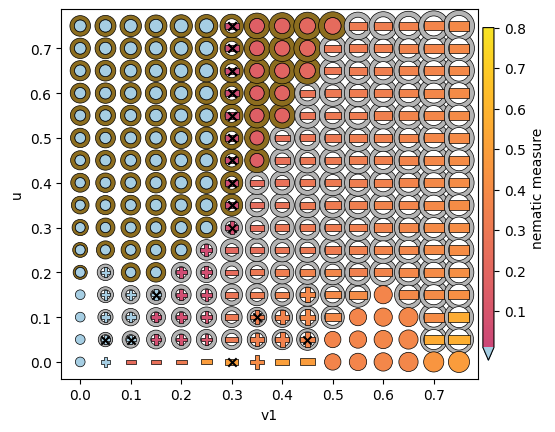

In [31]:
fig, ax = plt.subplots()
plot_phase_map(
    fig,
    ax,
    v1_mesh, u_mesh,
    sorted_ground_state_e/4,               # [...,0] read inside
    nematic_measure,
    ts_check, f_phase,
    f_max_measure,                       # or f_measure if you prefer mean
    cfg=CFG,
)
ax.set_xlabel("v1")
ax.set_ylabel("u")
ax.scatter(v1_arr[degenerate_index[1]], u_arr[degenerate_index[0]], marker='x', color='black', zorder=10)

# Single point check for scattering points.

In [32]:
import jax
import jax.numpy as jnp
import numpy as np
import os
from itertools import product

from functions_parameters.jax_schf_kernel import schf_fixed_filling_pmap_over_u, schf_single_job
from functions_parameters.jax_schf_helpers import *
from functions_parameters.universal_parameters import a, b
from functions_parameters.bond_table_generator import build_buckets_per_shell

# ---- numeric mode ----
from jax import config as _jax_config
_jax_config.update("jax_enable_x64", True)  # use float64 by default

Array = jnp.ndarray
PyTree = Any

'''
preparation:
'''
# order is important. for unit cell (0,0), (0,1), (1,0), (1,1), sublattice a, b and c respectively
basis_frac_o = np.array([[1/4, 0], [1/4, 1/4], [0, 1/4]])
basis_frac_1 = basis_frac_o + np.array([0, 1/2])
basis_frac_2 = basis_frac_o + np.array([1/2, 0])
basis_frac_3 = basis_frac_o + np.array([1/2, 1/2])
basis_frac = np.concatenate((basis_frac_o, basis_frac_1, basis_frac_2, basis_frac_3), axis=0)
norb = basis_frac.shape[0]

# halve the num_k_mesh
num_k_mesh = 60//2
# new translation vector
a = a*2
b = b/2

# k_mesh
b_0 = np.linspace(-b[0] / 2, b[0] / 2, num_k_mesh, endpoint=False)
b_1 = np.linspace(-b[1] / 2, b[1] / 2, num_k_mesh, endpoint=False)
k_mesh_points = np.vstack([v1 + v2 for v1, v2 in product(b_0, b_1)])
num_k_points = k_mesh_points.shape[0]

radii, a_lists, deltas = build_buckets_per_shell(a, basis_frac, 2)

# in this case, as both TB model and interaction, we include up to NNN, the a_list and deltas are the same
# calculate the correlation matrix
temperature = 4E-4
# filling has to be 4 times before, as we have 4 unit cells in the 2x2 square lattice
filling = 0.4*4
mu = 2
t_nn = 1
t_nnn = -0.025
t_arr = np.array([t_nn, t_nnn])

phase_pos, phase_neg = precompute_k_phase_tables(deltas, a, k_mesh_points)
Htb, e_all, v_all, v_all_dagger = hk_all_k_from_phases(mu, a_lists, t_arr, phase_neg)
dict_ref = prepare_reference_state(filling, a_lists, Htb, e_all, v_all, v_all_dagger, phase_pos, phase_neg, temperature)

Htb = jnp.stack((jnp.asarray(Htb), jnp.asarray(Htb)), axis=1)
filling = filling * 2
a_lists = jnp.asarray(a_lists)
phase_pos = jnp.asarray(phase_pos)
phase_neg = jnp.asarray(phase_neg)

### interchange (0,1) and (0,2)

In [33]:
u_index_input = 0
v_index_input = 2
input_d = sorted_density[u_index_input,v_index_input,0]
input_bond = sorted_bond[u_index_input,v_index_input,0]

u_index = 0
v_index = 1
u_arr_input = jnp.array([u_arr[u_index]])
v1_arr_input = jnp.array([v1_arr[v_index]])
v2_arr_input = v1_arr_input.copy()
v_arr = jnp.concatenate([v1_arr_input, v2_arr_input])
nshell = v_arr.shape[0]
ndeltas = deltas.shape[0]

res = schf_single_job(Htb, a_lists, phase_pos, phase_neg, dict_ref, input_d, input_bond, filling, u_arr_input, v_arr, temperature)


In [34]:
res['gse'], res['e_diff'], res['c_diff']

(Array([-4.92583827e-05], dtype=float64),
 Array(5.47872137e-10, dtype=float64),
 Array(9.90406327e-08, dtype=float64))

In [35]:
sorted_ground_state_e[u_index,v_index,0]

np.float64(-5.793497565048655e-05)

In [36]:
res['gse']<sorted_ground_state_e[u_index,v_index,0]

Array([False], dtype=bool)

### interchange (0,8) and (0,7)

In [37]:
u_index_input = 0
v_index_input = 8
input_d = sorted_density[u_index_input,v_index_input,0]
input_bond = sorted_bond[u_index_input,v_index_input,0]

u_index = 0
v_index = 7
u_arr_input = jnp.array([u_arr[u_index]])
v1_arr_input = jnp.array([v1_arr[v_index]])
v2_arr_input = v1_arr_input.copy()
v_arr = jnp.concatenate([v1_arr_input, v2_arr_input])
nshell = v_arr.shape[0]
ndeltas = deltas.shape[0]

res = schf_single_job(Htb, a_lists, phase_pos, phase_neg, dict_ref, input_d, input_bond, filling, u_arr_input, v_arr, temperature)

In [38]:
res['gse'], res['e_diff'], res['c_diff']

(Array([-0.18137793], dtype=float64),
 Array(2.75287126e-10, dtype=float64),
 Array(9.96409813e-08, dtype=float64))

In [39]:
sorted_ground_state_e[u_index,v_index,0]

np.float64(-0.18137793189328494)

In [40]:
sorted_ground_state_e[0,7,]

array([-0.18137793, -0.18137793, -0.18137793, -0.18137793, -0.18137793,
       -0.18137793, -0.18137793, -0.18137793, -0.18137793, -0.18137793,
       -0.18137793, -0.18137793, -0.18137793, -0.18137793, -0.17668495,
       -0.17668495, -0.17668495, -0.17668495, -0.17668495, -0.12473835,
        0.06811488,  0.06811488,  0.06811488,  0.06811488,  0.06811488,
        0.06811488,  0.06811488,  0.06811488,  0.06811488,  0.06811488,
        0.06811488,  0.06811488,  0.06811488,  0.06811488,  0.06811488,
        0.06811488,  0.06811488,  0.06811488,  0.06811488,  0.06811488,
        0.06811488,  0.06811488,  0.06811488,  0.06811488,  0.06811488,
        0.06811488,  0.06811488,  0.06811488,  0.06811488])

In [41]:
res['gse']<sorted_ground_state_e[u_index,v_index,0]

Array([False], dtype=bool)

In [42]:
TB_index=np.where(filtered_phase_diagram>3)
simplified_phase_diagram = filtered_phase_diagram.copy()
simplified_phase_diagram[TB_index] = 4

simplified_phase_list = unique_phase_name[:4]+['TSB']

In [43]:
np.mean(final_iteration)

np.float64(117.14787946428571)

In [44]:
np.max(final_iteration)

np.int32(500)

In [45]:
np.min(final_iteration)

np.int32(2)